<a href="https://colab.research.google.com/github/Vaishnavi741/STOCK-PREDICTION12/blob/main/NEW_DTW_EXPERIMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dir="/content/drive/MyDrive/Colab Notebooks/Aug31_Price_series (1).xlsx"
data=pd.read_excel(dir,index_col="time HHMMSS")

<Axes: xlabel='time HHMMSS'>

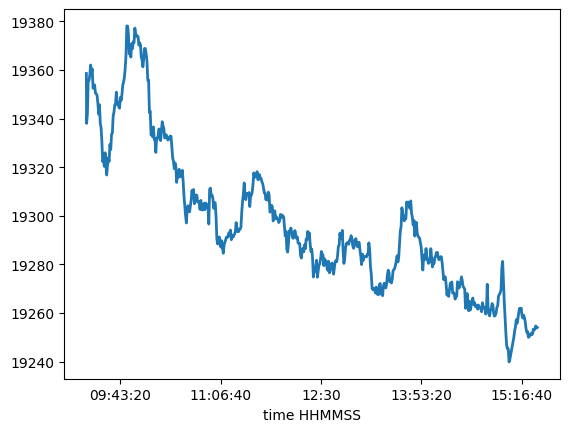

In [4]:
data['Price of Synthetic option derived future'].plot(x_compat=True,linewidth=2)

In [5]:
pip install dtw


  Preparing metadata (setup.py) ... done
  Created wheel for dtw: filename=dtw-1.4.0-py3-none-any.whl size=5299 sha256=543e6e9e9630d3f1f0119b717c294eea050a675ba0cb6d2cc75fe54e3e15286b
  Stored in directory: /root/.cache/pip/wheels/71/31/62/5e67f6e31521b8cc1652aa58b1ed0c892514d01eeee85fd49c
Successfully built dtw


In [6]:
import  matplotlib.pyplot as plt


In [7]:
pip install dtaidistance


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 8.6 MB/s eta 0:00:00


857

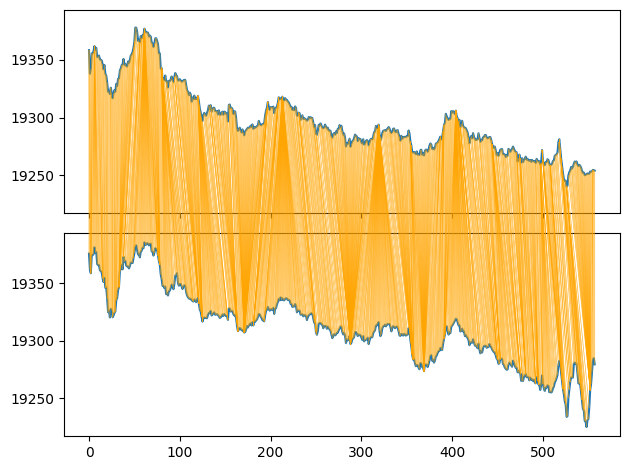

In [16]:
# DTW distance and warping path for Price of synthetic option And Spot Price.
df1=data[['Price of Synthetic option derived future']]
df2=data[['Spot price ltp NIFTY50']]
a=df1['Price of Synthetic option derived future'].values
b=df2['Spot price ltp NIFTY50'].values
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
path = dtw.warping_path(a, b,window=25)
dtwvis.plot_warping(a, b, path)
len(path)


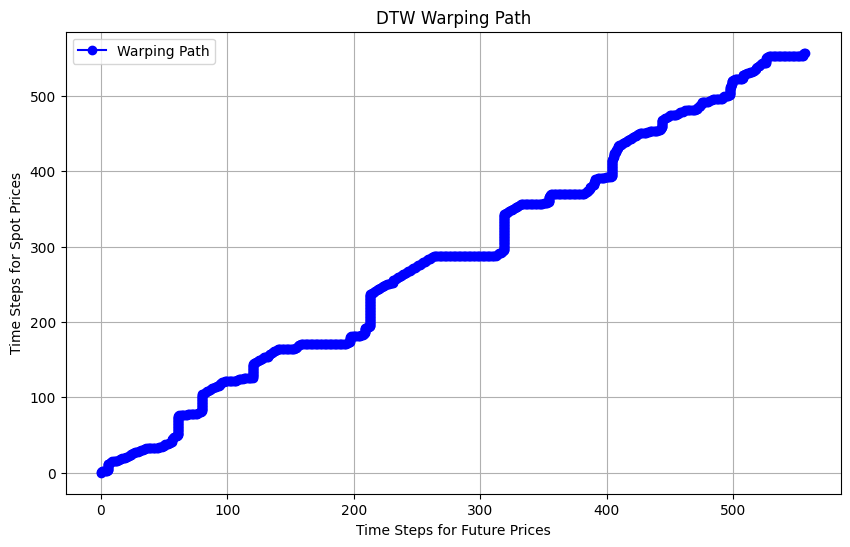

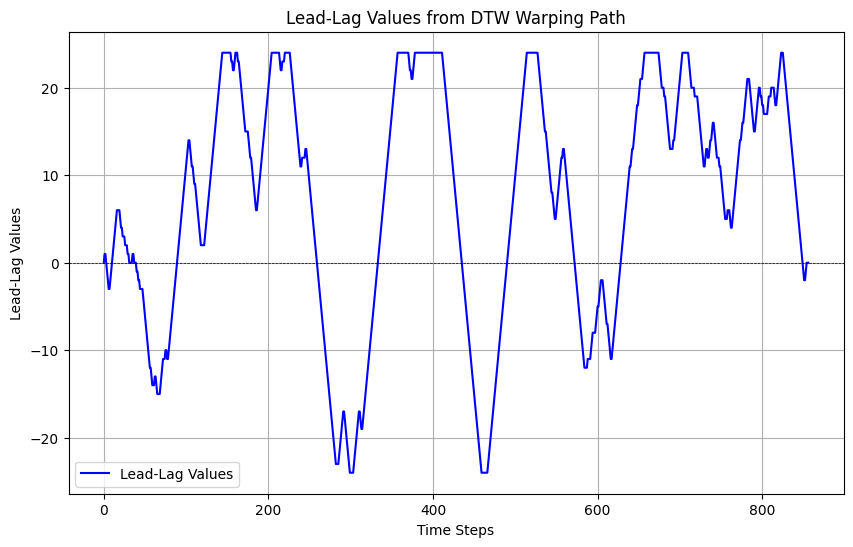

Based on lead-lag values, Future Price is leading Spot Price.


In [22]:
#from dtw import *
import matplotlib.pyplot as plt

# Given DTW warping path
#path = [(0, 0), (0, 1), (1, 2), (2, 2), ... (555, 554), (555, 555), (556, 556), (557, 557)]

# Extracting x and y values for the lead-lag calculation
x_values = [point[0] for point in path]
y_values = [point[1] for point in path]

# Calculate lead-lag values
lead_lag_values = [(y - x) for x, y in path]

# Plotting the warping path
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Warping Path', color='blue', marker='o')
plt.title('DTW Warping Path')
plt.xlabel('Time Steps for Future Prices')
plt.ylabel('Time Steps for Spot Prices')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the lead-lag values
plt.figure(figsize=(10, 6))
plt.plot(lead_lag_values, label='Lead-Lag Values', color='blue')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.title('Lead-Lag Values from DTW Warping Path')
plt.xlabel('Time Steps')
plt.ylabel('Lead-Lag Values')
plt.legend()
plt.grid(True)
plt.show()

# Interpretation
total_lead = sum(1 for value in lead_lag_values if value > 0)
total_lag = sum(1 for value in lead_lag_values if value < 0)

if total_lead > total_lag:
    leading_stock = "Future Price"
    lagging_stock = "Spot Price"
elif total_lead < total_lag:
    leading_stock = "Spot Price"
    lagging_stock = "Future Price"
else:
    leading_stock = lagging_stock = "No clear leader"

print(f"Based on lead-lag values, {leading_stock} is leading {lagging_stock}.")



In [9]:
d = dtw.distance_fast(a, b, use_pruning=True)
print(d)


147.74701758649886


<Axes: xlabel='time HHMMSS'>

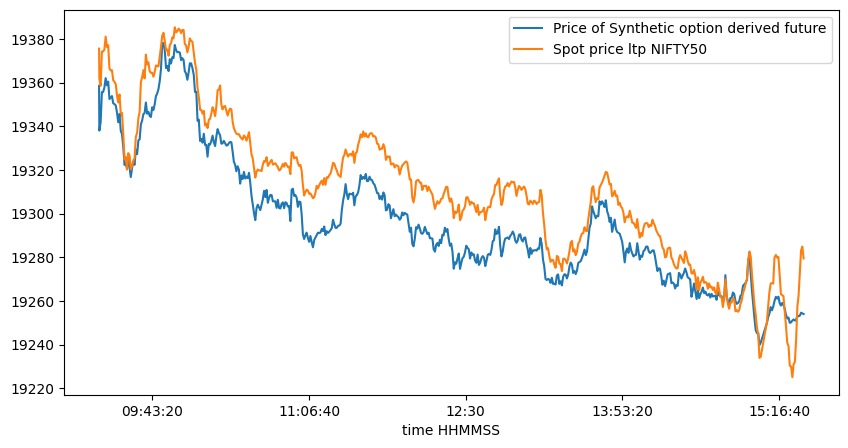

In [10]:
#Graph of synthetic Price and Spot Price.
data.loc[:,['Price of Synthetic option derived future','Spot price ltp NIFTY50']].plot( mark_right=False, figsize = (10,5), grid=False)


145.7335668265941


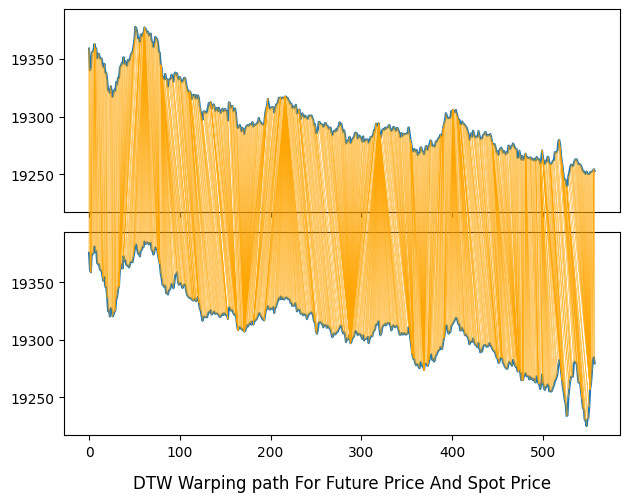

In [12]:
#DTW distance and warping path for Future price  And Spot Price.
df3=data[['price NIFTY23AUGFUT']]
c=df3['price NIFTY23AUGFUT'].values
path1 = dtw.warping_path(c, b,window=25)
dtwvis.plot_warping(c, b, path1)
d1= dtw.distance_fast(c, b, use_pruning=True)
plt.title("DTW Warping path For Future Price And Spot Price",y=-0.3)
print(d1)

<Axes: xlabel='time HHMMSS'>

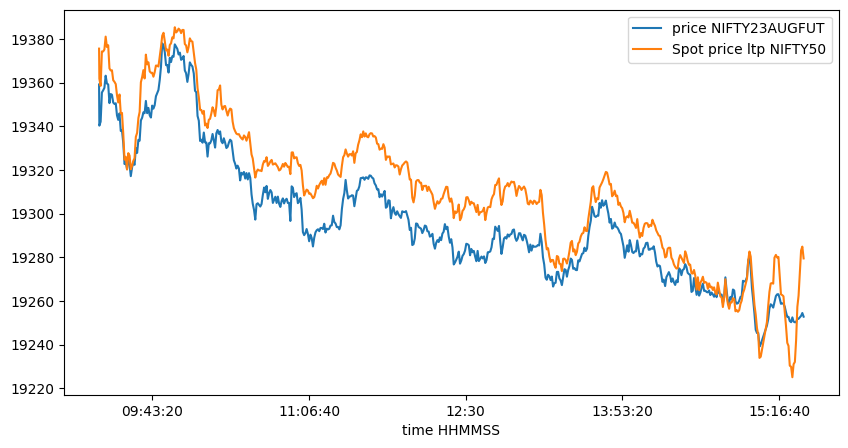

In [13]:
#Graph of Spot pRice and future price
data.loc[:,['price NIFTY23AUGFUT','Spot price ltp NIFTY50']].plot( mark_right=False, figsize = (10,5), grid=False)


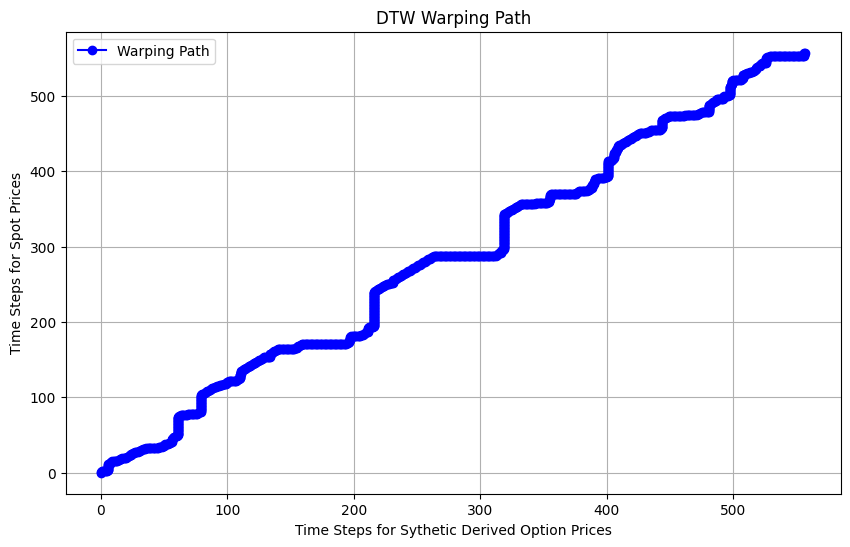

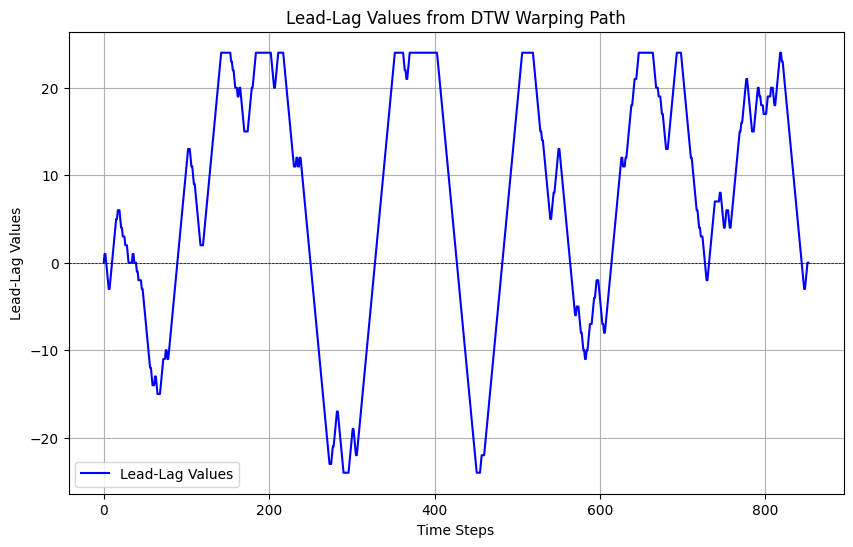

Based on lead-lag values, Option Price is leading Spot Price.


In [23]:
#from dtw import *
import matplotlib.pyplot as plt

# Extracting x and y values for the lead-lag calculation
x_values = [point[0] for point in path1]
y_values = [point[1] for point in path1]

# Calculate lead-lag values
lead_lag_values1 = [(y - x) for x, y in path1]

# Plotting the warping path
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Warping Path', color='blue', marker='o')
plt.title('DTW Warping Path')
plt.xlabel('Time Steps for Sythetic Derived Option Prices')
plt.ylabel('Time Steps for Spot Prices')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the lead-lag values
plt.figure(figsize=(10, 6))
plt.plot(lead_lag_values1, label='Lead-Lag Values', color='blue')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.title('Lead-Lag Values from DTW Warping Path')
plt.xlabel('Time Steps')
plt.ylabel('Lead-Lag Values')
plt.legend()
plt.grid(True)
plt.show()

# Interpretation
total_lead = sum(1 for value in lead_lag_values if value > 0)
total_lag = sum(1 for value in lead_lag_values if value < 0)

if total_lead > total_lag:
    leading_stock = "Option Price"
    lagging_stock = "Spot Price"
elif total_lead < total_lag:
    leading_stock = "Spot Price"
    lagging_stock = "Option Price"
else:
    leading_stock = lagging_stock = "No clear leader"

print(f"Based on lead-lag values, {leading_stock} is leading {lagging_stock}.")
